Jalen Buffert 

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Friday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
def print_model(bias, Theta, X_names, model_name = None):
    
    if model_name is None:
        model_str = f' y ='
    else:
        model_str = f'{model_name}:\n y ='
        
    if not bias == 0: 
        model_str += f' {bias:.2f}'
        
    for theta, x in zip(Theta, X_names):
        if theta ==0:
            continue
        else:
            model_str+= f' + {theta:.2f}*{x}'
            
    print(model_str)

In [4]:
np.random.seed(15)
bias = 20*np.random.randn()

X, y, coef = make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 5 --> simple linear regression
                                   noise=10, 
                                   bias = bias, 
                                   random_state=5, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df

,x1,x2,x3,x4,x5,y
0,0.441227,-0.330870,2.430771,-0.252092,0.109610,244.349429
1,1.582481,-0.909232,-0.591637,0.187603,-0.329870,-66.739816
2,-1.192765,-0.204877,-0.358829,0.603472,-1.664789,-154.409110
3,-0.700179,1.151391,1.857331,-1.511180,0.644848,194.236600
4,-0.980608,-0.856853,-0.871879,-0.422508,0.996440,-87.092471
...,...,...,...,...,...,...
295,0.423162,-0.988746,0.741750,1.130381,-0.189154,67.307896
296,-2.075862,-0.911934,0.037560,0.697767,-0.506700,-90.781843
297,1.006915,-0.513603,-1.360830,0.438510,-0.675455,-150.392513
298,1.310846,1.089519,-0.400579,-0.621525,0.217709,11.909130


In [5]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=9)

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

y_pred_train = model_1.predict(X_train)
y_pred_test = model_1.predict(X_test)

R2_train = model_1.score(X_train, y_train)
R2_test = model_1.score(X_test, y_test)

MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

model_1.__dict__

print_model(model_1.intercept_, model_1.coef_, column_names, 'Model 1')
print_model(bias, coef, column_names, 'True Model')
print(f'R2 test: {R2_test:.3f}')
print(f'MSE test: {MSE_test:.3f}')



Model 1:
 y = -6.88 + 21.52*x1 + 21.04*x2 + 95.90*x3 + 6.66*x4 + 49.21*x5
True Model:
 y = -6.25 + 21.88*x1 + 21.21*x2 + 96.62*x3 + 6.93*x4 + 48.32*x5
R2 test: 0.993
MSE test: 85.502


#### Your written answers here

What are your model parameters?
 - My model parameters is the model 1 interecept and model 1 coefficent

What were your MSE and R^2?
 - R2 test: 0.993
MSE test: 85.502



## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [6]:
np.random.seed(15)
bias = 50*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=9,    # n_features = 1 --> simple linear regression
                                   noise=3, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 6,
                                   random_state=15, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

Xa = (0.6*X[:, 2] +0.4*X[:, 5]).reshape(-1,1)
X = np.hstack([X,Xa])
coef = np.append(coef,0)

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

reg2_df

print_model(bias, coef, column_names, model_name = 'True Model')

True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6


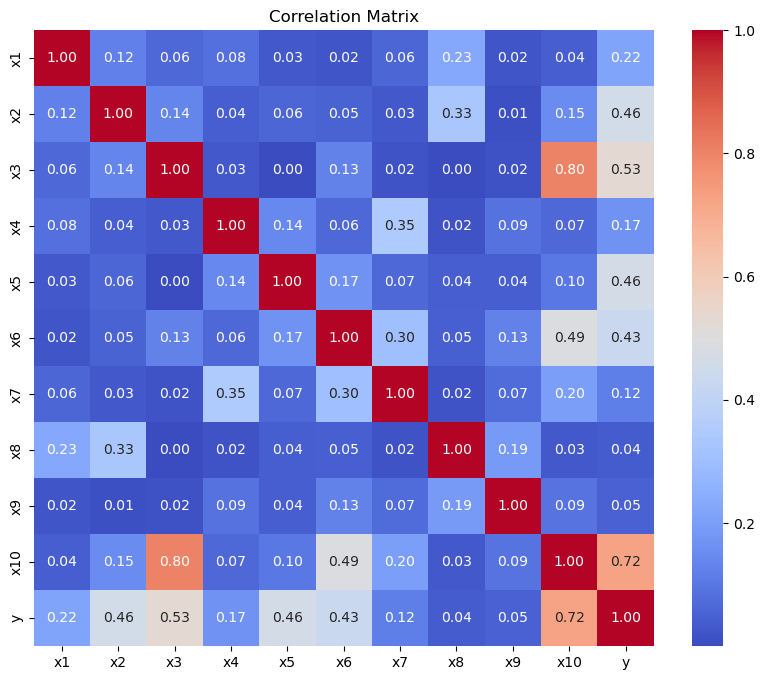

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(np.abs(reg2_df.corr()), annot= True , cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Matrix")
plt.show()

In [8]:
candidate_idx = np.array([1,2,3,4,5,6,7,8,9,10])-1

Z = X[:, candidate_idx]
Z_names =[column_names[idx] for idx in candidate_idx]

Z_train,Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.2)

model_LR = LinearRegression()
model_LR.fit(Z_train, y_train)

y_pred_train = model_LR.predict(Z_train)
y_pred_test = model_LR.predict(Z_test)

R2_train = model_LR.score(Z_train,y_train)
R2_test = model_LR.score(Z_test, y_test)

MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)


print(R2_train, R2_test)
print_model(bias, coef, column_names, model_name = 'True Model')
print_model(model_LR.intercept_, model_LR.coef_, Z_names, model_name = 'Fit model')
print(f'R2 test: {R2_test: 0.3f}')
print(f'MSE test: {MSE_test: 0.3f}')


0.8666713648646942 0.887630847512792
True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6
Fit model:
 y = -15.37 + 59.36*x1 + 75.61*x2 + 67.60*x3 + 13.74*x4 + 56.52*x5 + 50.11*x6 + -8.86*x7 + -2.05*x8 + 1.14*x9 + 60.61*x10
R2 test:  0.888
MSE test:  7.733


In [11]:
# Identify significant features based on the absolute value of coefficients
significant_features = np.argsort(np.abs(model_LR.coef_))[::-1][:3]
significant_feature_names = [Z_names[i] for i in significant_features]

# Check for collinearity using the correlation matrix
collinear_features = []
threshold = 0.8  # Define a threshold for high correlation
corr_matrix = reg2_df.corr()
for i in range(len(Z_names)):
    for j in range(i + 1, len(Z_names)):
        if np.abs(corr_matrix.iloc[i, j]) > threshold:
            collinear_features.append((Z_names[i], Z_names[j]))

print(f'Significant features: {significant_feature_names}')
print(f'Collinear features: {collinear_features}')

Significant features: ['x2', 'x3', 'x10']
Collinear features: [('x3', 'x10')]


#### Your written answers here

What are your model parameters?
 - My model parameters are the model_LR intercept and coefficient

Which features (x1, x2...) were significant? Which were co-linear?
 - x10, x3, and x6 are significant, none of the features had collinearity
 
What were your MSE and R^2?
 - R2 test:  0.860
MSE test:  10.258



## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [20]:
housing_df = pd.read_csv('kc_house_data.csv')
housing_df = housing_df.drop(columns=['id', 'date', 'zipcode'])
housing_df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


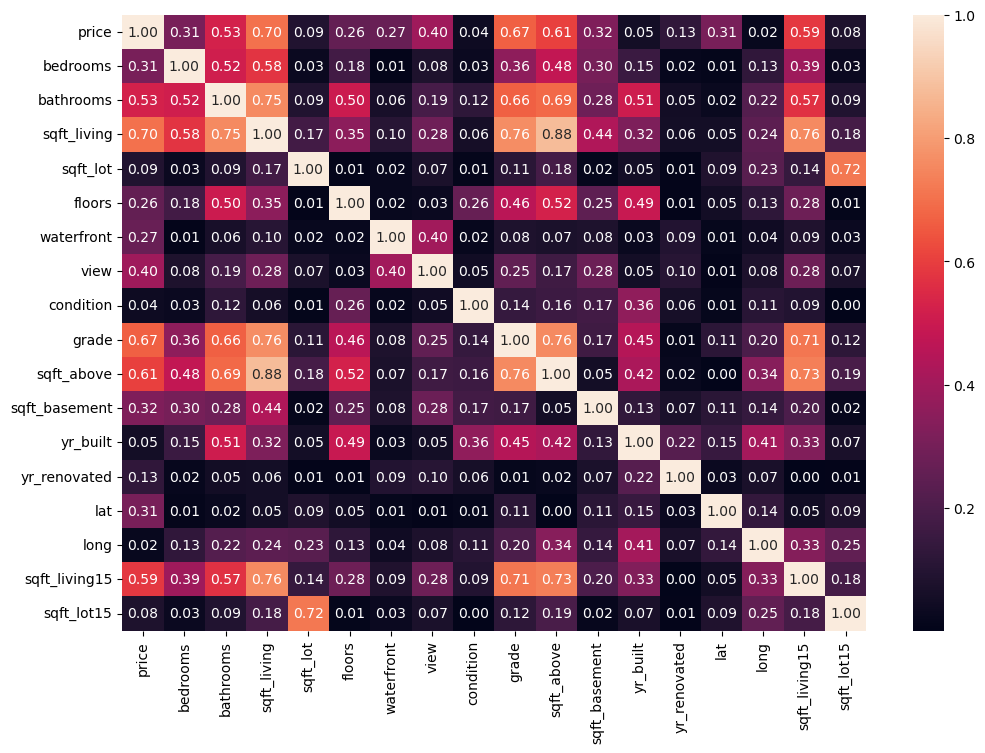

In [21]:
# Drop non-numeric columns
numeric_housing_df = housing_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_housing_df.corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(np.abs(corr_matrix), annot=True, fmt='.2f')
plt.show()



### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


In [22]:
X = housing_df[['bathrooms', 'sqft_above', 'grade']]
y = housing_df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


0.46942120984977287 0.4839763623280874


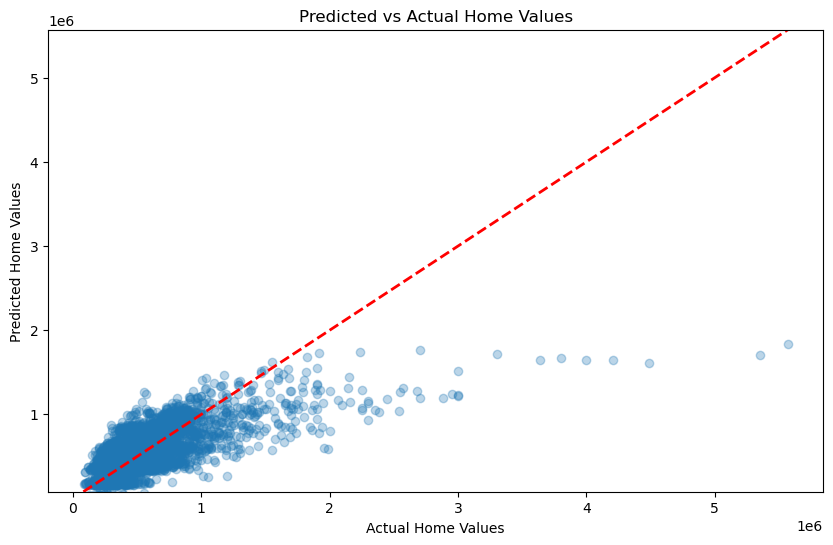

In [23]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

X_scaled_train = ss.transform(X_train)
X_scaled_test = ss.transform(X_test)

model_linreg = LinearRegression()
model_linreg.fit(X_scaled_train, y_train)

R2_train = model_linreg.score(X_scaled_train,y_train)
R2_test = model_linreg.score(X_scaled_test, y_test)


print(R2_train, R2_test)


# Plot predicted vs actual home values
y_pred_train = model_linreg.predict(X_scaled_train)
y_pred = model_linreg.predict(X_scaled_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Home Values')
plt.ylim([y_test.min().item(), y_test.max().item()])
plt.ylabel('Predicted Home Values')
plt.title('Predicted vs Actual Home Values')
plt.show()


#### Your written answers here
Which features are you using and why?
 
 - I used bedrooms, sqft_above, and grade as my features because they all had relatively high correlations with price. Also, when I think about buying a house these are some factors that I would highly consider. 

### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

In [24]:
from sklearn.linear_model import Lasso, Ridge

X = housing_df.drop(columns=['price'])

feature_names = X.columns

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

ss = StandardScaler()
ss.fit(X_train)

X_scaled_train = ss.transform(X_train)
X_scaled_test = ss.transform(X_test)


model_lasso = Lasso(alpha=0.5)
model_lasso.fit(X_scaled_train,y_train)

y_pred_train = model_lasso.predict(X_scaled_train)
y_pred_test = model_lasso.predict(X_scaled_test)

R2_train = model_lasso.score(X_scaled_train, y_train)
R2_test = model_lasso.score(X_scaled_test, y_test)

print(R2_train, R2_test)
print_model(bias, coef, column_names, model_name = 'True Model')
print_model(model_LR.intercept_, model_LR.coef_, Z_names, model_name = 'Fit model')


coef = model_lasso.coef_

largest_coef_ind = np.argsort(np.abs(coef))[-3:]

largest_coef_feat = feature_names[largest_coef_ind]

print(f'The 3 features with the largest coefficients are: {largest_coef_feat}')


0.6947392043664083 0.6974550576882736
True Model:
 y = -15.62 + -30995.94*x1 + 29953.87*x2 + 259818.40*x3 + 5228.53*x4 + -470.21*x5 + 54641.02*x6 + 37908.41*x7 + 21096.98*x8 + 116254.32*x9 + -84936.13*x10
Fit model:
 y = -15.37 + 59.36*x1 + 75.61*x2 + 67.60*x3 + 13.74*x4 + 56.52*x5 + 50.11*x6 + -8.86*x7 + -2.05*x8 + 1.14*x9 + 60.61*x10
The 3 features with the largest coefficients are: Index(['sqft_above', 'grade', 'sqft_living'], dtype='object')


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.417e+13, tolerance: 2.389e+11
  model = cd_fast.enet_coordinate_descent(


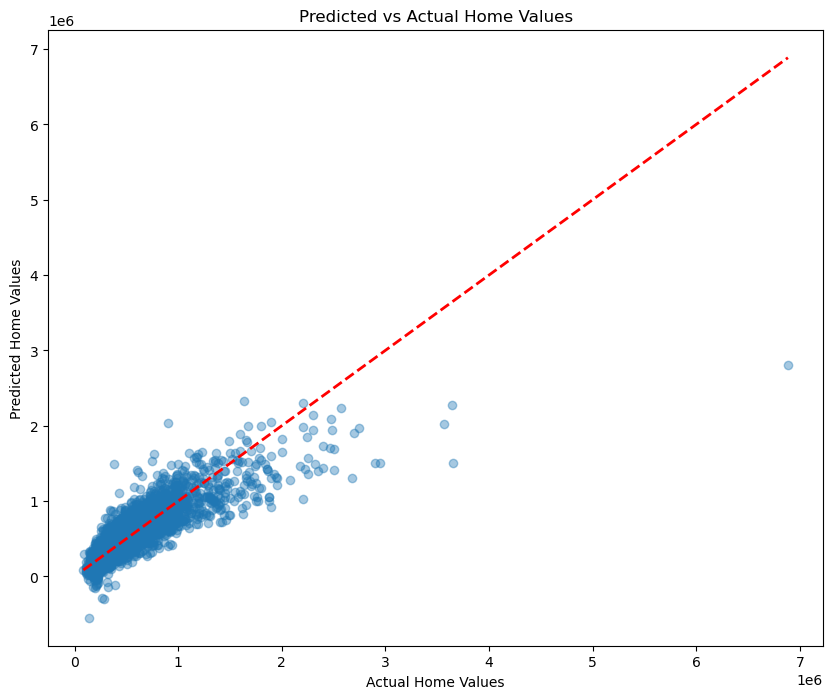

In [25]:
y_pred_train = model_lasso.predict(X_scaled_train)
y_pred = model_lasso.predict(X_scaled_test)

fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(y_test, y_pred, alpha=0.4)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax.set_xlabel('Actual Home Values')
ax.set_ylabel('Predicted Home Values')
ax.set_title('Predicted vs Actual Home Values')
plt.show()


### Your written answers here
Which regression did you use?
 - I used a Lasso Regression

Does your regularized model look better than your MLR? How so?
 - Yes my model looks better than the MLR model. The predicted values look more accurate to the actual values. Also, the R2 for my model went above .65 on the first try without having to adjust alpha

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

<Your written answers>

In [26]:
# Split the data into homes below and above $1M sale price
below_1M = housing_df[housing_df['price'] < 1000000]
above_1M = housing_df[housing_df['price'] >= 1000000]

X_below = below_1M.drop(columns=['price'])
y_below = below_1M['price']
X_above = above_1M.drop(columns=['price'])
y_above = above_1M['price']

# Split the below $1M data
X_train_below, X_test_below, y_train_below, y_test_below = train_test_split(X_below, y_below, test_size=0.2)

# Standardize the below $1M data
ss_below = StandardScaler()
ss_below.fit(X_train_below)

X_scaled_train_below = ss_below.transform(X_train_below)
X_scaled_test_below = ss_below.transform(X_test_below)

# Fit the Lasso model for below $1M data
model_lasso_below = Lasso(alpha=0.5)
model_lasso_below.fit(X_scaled_train_below, y_train_below)

y_pred_train_below = model_lasso_below.predict(X_scaled_train_below)
y_pred_test_below = model_lasso_below.predict(X_scaled_test_below)

R2_train_below = model_lasso_below.score(X_scaled_train_below, y_train_below)
R2_test_below = model_lasso_below.score(X_scaled_test_below, y_test_below)

print(f'R2 train (below $1M): {R2_train_below}')
print(f'R2 test (below $1M): {R2_test_below}')

# Split the above $1M data
X_train_above, X_test_above, y_train_above, y_test_above = train_test_split(X_above, y_above, test_size=0.2)

# Standardize the above $1M data
ss_above = StandardScaler()
ss_above.fit(X_train_above)

X_scaled_train_above = ss_above.transform(X_train_above)
X_scaled_test_above = ss_above.transform(X_test_above)

# Fit the Lasso model for above $1M data
model_lasso_above = Lasso(alpha=0.5)
model_lasso_above.fit(X_scaled_train_above, y_train_above)

y_pred_train_above = model_lasso_above.predict(X_scaled_train_above)
y_pred_test_above = model_lasso_above.predict(X_scaled_test_above)

R2_train_above = model_lasso_above.score(X_scaled_train_above, y_train_above)
R2_test_above = model_lasso_above.score(X_scaled_test_above, y_test_above)

print(f'R2 train (above $1M): {R2_train_above}')
print(f'R2 test (above $1M): {R2_test_above}')


R2 train (below $1M): 0.6846464827229197
R2 test (below $1M): 0.6976328916099088
R2 train (above $1M): 0.5157039042893085
R2 test (above $1M): 0.5166770914632799


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.611e+12, tolerance: 6.142e+10
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.055e+13, tolerance: 4.277e+10
  model = cd_fast.enet_coordinate_descent(


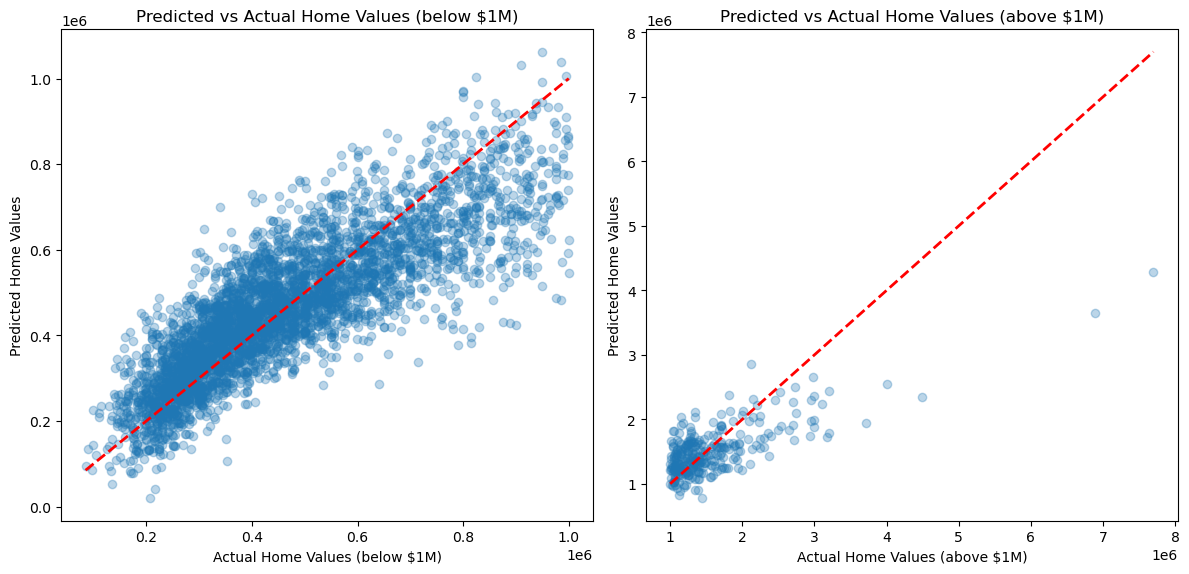

In [27]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test_below, y_pred_test_below, alpha=0.3)
plt.plot([y_test_below.min(), y_test_below.max()], [y_test_below.min(), y_test_below.max()], 'r--', lw=2)
plt.xlabel('Actual Home Values (below $1M)')
plt.ylabel('Predicted Home Values')
plt.title('Predicted vs Actual Home Values (below $1M)')

# Plot predicted vs actual for above $1M
plt.subplot(1, 2, 2)
plt.scatter(y_test_above, y_pred_test_above, alpha=0.3)
plt.plot([y_test_above.min(), y_test_above.max()], [y_test_above.min(), y_test_above.max()], 'r--', lw=2)
plt.xlabel('Actual Home Values (above $1M)')
plt.ylabel('Predicted Home Values')
plt.title('Predicted vs Actual Home Values (above $1M)')

plt.tight_layout()
plt.show()


 ### Your written answers here

 What are the $R^2$ for the two models?

  - R2 for homes below 1m is .69
  R2 for homes above 1m is 0.39
 
